In [29]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.utils import resample
from scipy import stats

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Preprocess

In [30]:
# Load the crimes data
data = pd.read_csv('project_data.csv')
data.drop(columns=['X Coordinate', 'Y Coordinate', 'Year', 'Updated On', 'IUCR', 'Case Number', 'Description'], inplace=True)

# Load the weather data
temperatures = pd.read_csv('data/daily_chicago_weather_2022.csv')

CRITICAL_Z = 1.5

In [31]:
seasons_mapping = {
    'Winter': [12, 1, 2],
    'Spring': [3, 4, 5],
    'Summer': [6, 7, 8],
    'Fall': [9, 10, 11]
}

locations_mapping = {
    'RESIDENCE': 'RESIDENCE',
    'APARTMENT': 'RESIDENCE',
    'STREET': 'STREET',
    'COMMERalphaAL / BUSINESS OFFICE': 'OFFICE',
    'HOSPITAL BUILDING / GROUNDS': 'HOSPITAL',
    'WAREHOUSE': 'WAREHOUSE',
    'VEHICLE - COMMERalphaAL': 'VEHICLE',
    'SCHOOL - PUBLIC GROUNDS': 'SCHOOL',
    'OTHER (SPEalphaFY)': 'OTHER',
    'GOVERNMENT BUILDING / PROPERTY': 'GOVERNMENT_PROPERTY',
    'RESIDENCE - PORCH / HALLWAY': 'RESIDENCE',
    'SIDEWALK': 'STREET',
    'PARKING LOT / GARAGE (NON RESIDENTIAL)': 'PARKING_LOT',
    'BANK': 'BANK',
    'ALLEY': 'STREET',
    'POLICE FAalphaLITY / VEHICLE PARKING LOT': 'POLICE FAalphaLITY',
    'MOVIE HOUSE / THEATER': 'THEATER',
    'VEHICLE NON-COMMERalphaAL': 'VEHICLE',
    'OTHER RAILROAD PROPERTY / TRAIN DEPOT': 'PUBLIC_TRANSPORT',
    'SCHOOL - PUBLIC BUILDING': 'SCHOOL',
    'DAY CARE CENTER': 'DAY CARE CENTER',
    'VEHICLE - OTHER RIDE SHARE SERVICE (LYFT, UBER, ETC.)': 'VEHICLE',
    'BAR OR TAVERN': 'BAR',
    'CTA PLATFORM': 'PUBLIC_TRANSPORT',
    'AUTO / BOAT / RV DEALERSHIP': 'OFFICE',
    'SMALL RETAIL STORE': 'STORE',
    'GAS STATION': 'GAS STATION',
    'RESIDENCE - YARD (FRONT / BACK)': 'RESIDENCE',
    'RESTAURANT': 'BUSINESSES',
    'PARKING LOT': 'PARKING LOT',
    'VACANT LOT / LAND': 'VACANT',
    'BARBERSHOP': 'BUSINESSES',
    'CTA BUS STOP': 'PUBLIC_TRANSPORT',
    'RESIDENCE - GARAGE': 'RESIDENCE',
    'HOUSE': 'RESIDENCE',
    'HOTEL / MOTEL': 'HOTEL',
    'DEPARTMENT STORE': 'BUSINESSES',
    'ATM (AUTOMATIC TELLER MACHINE)': 'ATM',
    'JAIL / LOCK-UP FACILITY': 'JAIL',
    'ABANDONED BUILDING': 'VACANT',
    'DRIVEWAY - RESIDENTIAL': 'RESIDENCE',
    'PARK PROPERTY': 'PARK',
    'FEDERAL BUILDING': 'GOVERNMENT_PROPERTY',
    'CLEANING STORE': 'BUSINESSES',
    'MEDICAL / DENTAL OFFICE': 'BUSINESSES',
    'ATHLETIC CLUB': 'SPORT',
    'FACTORY / MANUFACTURING BUILDING': 'FACTORY',
    'CONVENIENCE STORE': 'BUSINESSES',
    'CONSTRUCTION SITE': 'OTHER',
    'CURRENCY EXCHANGE': 'CURRENCY_EXCHANGE',
    'GROCERY FOOD STORE': 'BUSINESSES',
    'AIRPORT PARKING LOT': 'PARKING_LOT',
    'CHURCH / SYNAGOGUE / PLACE OF WORSHIP': 'RELIGIOUS',
    'DRUG STORE': 'MEDICAL',
    'APPLIANCE STORE': 'BUSINESSES',
    'SPORTS ARENA / STADIUM': 'SPORT',
    'CHA APARTMENT': 'RESIDENCE',
    'AIRPORT TERMINAL UPPER LEVEL - SECURE AREA': 'AIRPORT',
    'OTHER COMMERCIAL TRANSPORTATION': 'PUBLIC_TRANSPORT',
    'CREDIT UNION': 'OTHER',
    'AIRPORT EXTERIOR - NON-SECURE AREA': 'AIRPORT',
    'CTA BUS': 'PUBLIC_TRANSPORT',
    'AIRPORT VENDING ESTABLISHMENT': 'AIRPORT',
    'BOWLING ALLEY': 'BUSINESSES',
    'SCHOOL - PRIVATE GROUNDS': 'SCHOOL',
    'AIRPORT/AIRCRAFT': 'AIRPORT',
    'NURSING / RETIREMENT HOME': 'RETIREMENT_HOME',
    'AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA': 'AIRPORT',
    'TAVERN / LIQUOR STORE': 'BAR',
    'SCHOOL - PRIVATE BUILDING': 'SCHOOL',
    'AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA': 'AIRPORT',
    'CAR WASH': 'BUSINESSES',
    'CTA TRAIN': 'PUBLIC_TRANSPORT',
    'CHA PARKING LOT / GROUNDS': 'PARKING_LOT',
    'LIBRARY': 'BUSINESSES',
    'AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA': 'AIRPORT',
    'FIRE STATION': 'PUBLIC_BUILDING',
    'CTA STATION': 'PUBLIC_TRANSPORT',
    'GARAGE': 'BUSINESSES',
    'TAVERN': 'BAR',
    'COLLEGE / UNIVERSITY - RESIDENCE HALL': 'PUBLIC_BUILDING',
    'YARD': 'PARK',
    'AUTO': 'OTHER',
    'AIRPORT BUILDING NON-TERMINAL - SECURE AREA': 'AIRPORT',
    'BOAT / WATERCRAFT': 'VEHICLE',
    'VESTIBULE': 'OTHER',
    'LAKEFRONT / WATERFRONT / RIVERBANK': 'PARK',
    'AIRCRAFT': 'AIRCRAFT',
    'VEHICLE - DELIVERY TRUCK': 'VEHICLE',
    'PAWN SHOP': 'BUSINESSES',
    'PORCH': 'RESIDENCE',
    'CTA PROPERTY': 'PUBLIC_TRANSPORT',
    'HALLWAY': 'OTHER',
    'BANQUET HALL': 'PUBLIC_BUILDING',
    'RETAIL STORE': 'BUSINESSES',
    'CHA PARKING LOT': 'PARKING_LOT',
    'CTA "L" TRAIN': 'PUBLIC_TRANSPORT',
    'HOTEL': 'HOTEL',
    'SCHOOL YARD': 'SCHOOL',
    'VACANT LOT': 'VACANT',
    'CHA GROUNDS': 'VACANT',
    'GAS STATION DRIVE/PROP.': 'PUBLIC_BUILDING',
    'DRIVEWAY': 'PARKING_LOT',
    'BASEMENT': 'RESIDENCE',
    'BARBER SHOP/BEAUTY SALON': 'BUSINESSES',
    'CHA LOBBY': 'PUBLIC_BUILDING',
    'RAILROAD PROPERTY': 'PUBLIC_TRANSPORT',
    'POLICE FACILITY': 'POLICE',
    'RIVER BANK': 'PARK',
    'LIQUOR STORE': 'BAR',
    'OFFICE': 'OFFICE',
    'TRUCK': 'VEHICLE',
    'PUBLIC GRAMMAR SCHOOL': 'SCHOOL',
    'STAIRWELL': 'OTHER',
    'ANIMAL HOSPITAL': 'BUSINESSES',
    'CHA HALLWAY / STAIRWELL / ELEVATOR': 'OTHER',
    'CTA PARKING LOT / GARAGE / OTHER PROPERTY': 'PARKING_LOT',
    'TAXICAB': 'VEHICLE',
    'AIRPORT TERMINAL LOWER LEVEL - SECURE AREA': 'AIRPORT',
    'COLLEGE / UNIVERSITY - GROUNDS': 'PUBLIC_BUILDING',
    'BRIDGE': 'STREET',
    'AIRPORT EXTERIOR - SECURE AREA': 'AIRPORT',
    'COIN OPERATED MACHINE': 'ATM',
    'AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA': 'AIRPORT',
    'POOL ROOM': 'BUSINESSES',
    'CTA TRACKS - RIGHT OF WAY': 'PUBLIC_TRANSPORT',
    'SAVINGS AND LOAN': 'BANK',
    'HIGHWAY / EXPRESSWAY': 'VEHICLE',
    'AIRPORT TRANSPORTATION SYSTEM (ATS)': 'AIRPORT',
    'FOREST PRESERVE': 'PARK',
    'VEHICLE - COMMERCIAL: TROLLEY BUS': 'VEHICLE',
    'CEMETARY': 'PUBLIC_BUILDING',
    'VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS': 'VEHICLE',
    'FARM': 'RESIDENCE',
}

part_of_day_mapping = {
    '0': 'Night',
    '1': 'Night',
    '2': 'Night',
    '3': 'Night',
    '4': 'Night',
    '5': 'Night',
    '6': 'Morning',
    '7': 'Morning',
    '8': 'Morning',
    '9': 'Morning',
    '10': 'Morning',
    '11': 'Morning',
    '12': 'Afternoon',
    '13': 'Afternoon',
    '14': 'Afternoon',
    '15': 'Afternoon',
    '16': 'Afternoon',
    '17': 'Afternoon',
    '18': 'Evening',
    '19': 'Evening',
    '20': 'Evening',
    '21': 'Evening',
    '22': 'Evening',
    '23': 'Evening',
}

def fahrenheit_to_celsius(temp):
    return (temp - 32) * 5 / 9

def date_to_season(date):
    month = int(date.split('/')[0])
    for season in seasons_mapping.keys():
        if month in seasons_mapping[season]:
            return season

def format_date(date_str):
    month, day, year = date_str.split('/')
    month = int(month)
    day = int(day)
    return f"{month}/{day}"


# Create a dictionary that maps each day to the average temperature
day_to_temp = {}
for index, row in temperatures.iterrows():
    day_to_temp[format_date(row['date'])] = row['temp_avg']


# Reformating the date for the data df
days = []
for index, row in data.iterrows():
    days.append(format_date(row['Date'].split(' ')[0]))

# Extracting the day from the date
data['day'] = pd.Series(days)

# Mapping the locations to a more general category
data['Location Description'] = data['Location Description'].apply(lambda x: locations_mapping[x] if x in locations_mapping else 'OTHER')
data.rename(columns={'Location Description': 'Location'}, inplace=True)

# Mapping the time of the day to a more general category
data['part_of_day'] = data['Date'].apply(lambda x: part_of_day_mapping[x.split(' ')[1].split(':')[0]])

# Extracting the hour from the date
data['hour'] = data['Date'].apply(lambda x: round(float(x.split(' ')[1].split(':')[0]) + float(x.split(' ')[1].split(':')[1]) / 60, 2))

# Mapping the days to seasons and adding the temperature
data['season'] = data['Date'].apply(date_to_season)
data['temperature'] = data['day'].apply(lambda x: round(fahrenheit_to_celsius(day_to_temp[x]), 1))

In [32]:
# Normalizing the temperature and define treatment as Z-score > critical Z-score
seasons_temperature_stats = data.groupby(['season'])['temperature'].aggregate(['mean', 'std'])
seasons_mean = seasons_temperature_stats['mean']
seasons_std = seasons_temperature_stats['std']

data['normalized_temperature'] = data.apply(lambda x: (x['temperature'] - seasons_mean[x['season']]) / seasons_std[x['season']], axis=1)
data['T'] = data['normalized_temperature'] > CRITICAL_Z

# Exploration

In [33]:
data = pd.read_csv('project_data_preprocessed.csv')

#### Initial hypthesis testing

In [34]:
# Calculate arrest rates in abnormal vs normal temperature days
high_temp_arrest_rate = data[data['T'] == 1]['Arrest'].mean()
low_temp_arrest_rate = data[data['T'] == 0]['Arrest'].mean()

print(f"High Temperature Arrest Rate: {high_temp_arrest_rate:.2f}")
print(f"Low Temperature Arrest Rate: {low_temp_arrest_rate:.2f}")


# Perform t-test between high and low temp groups
t_stat, p_value = stats.ttest_ind(data[data['T'] == 1]['Arrest'], data[data['T'] == 0]['Arrest'])
print(f'T-Statistic: {t_stat:.2f}, P-value: {p_value:.3f}')


High Temperature Arrest Rate: 0.13
Low Temperature Arrest Rate: 0.12
T-Statistic: 4.54, P-value: 0.000


#### Looking for confounders

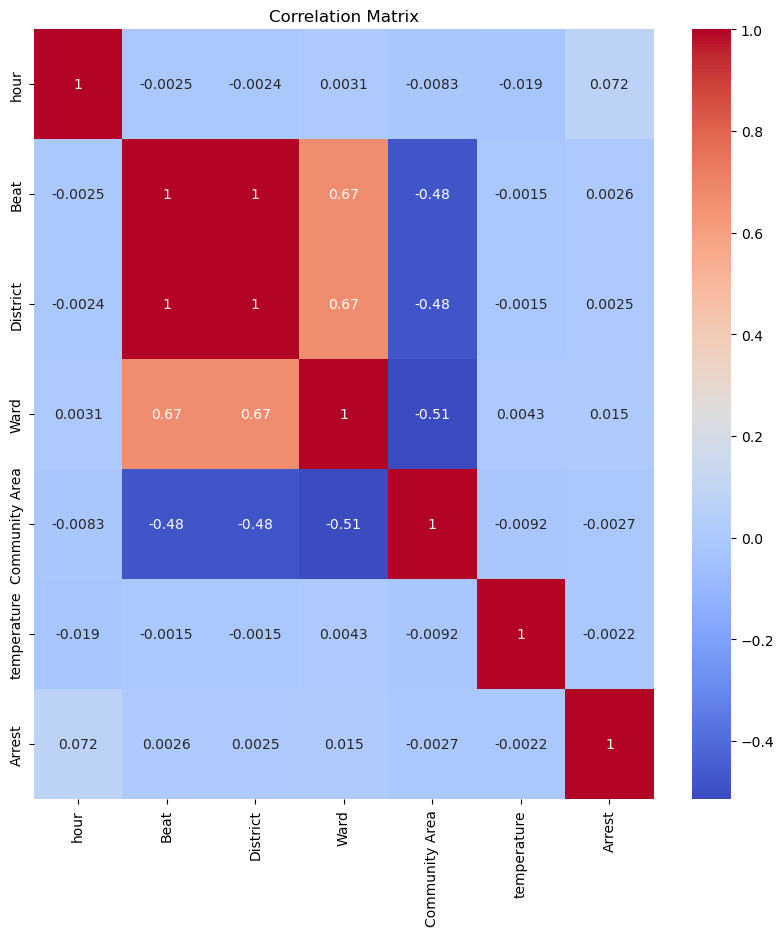

In [35]:
# Correlation matrix
corr_matrix = data[['hour', 'Beat', 'District', 'Ward', 'Community Area', 'temperature', 'Arrest']].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Further diving into the data

#### Crime and arrests rates over the year

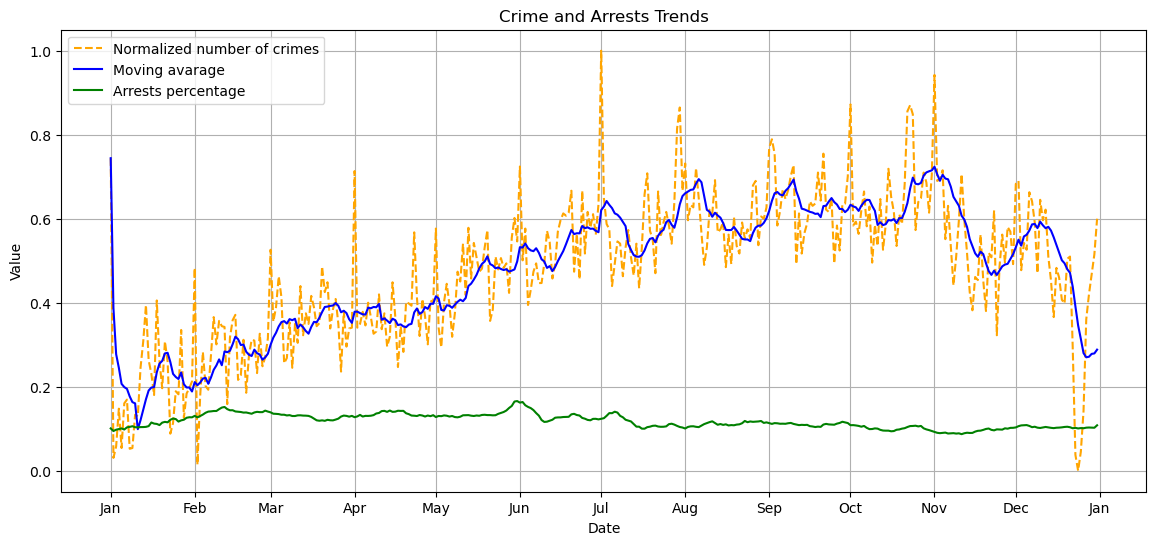

In [36]:
crimes_per_day = data.groupby(['day'])['ID'].aggregate('count')
arrests_percentage = data.groupby(['day'])['Arrest'].aggregate('mean')

# Apply Min-Max normalization on the number of crimes per day
min_value = crimes_per_day.min()
max_value = crimes_per_day.max()
crimes_per_day_normalized = (crimes_per_day - min_value) / (max_value - min_value)


crimes_per_day_normalized.index = pd.to_datetime(crimes_per_day_normalized.index, format='%m/%d')
crimes_per_day_normalized = crimes_per_day_normalized.sort_index()


arrests_percentage.index = pd.to_datetime(arrests_percentage.index, format='%m/%d')
arrests_percentage = arrests_percentage.sort_index()

# Calculate moving average
window_length = 10
crimes_moving_avg = crimes_per_day_normalized.rolling(window=window_length, min_periods=1).mean()
arrests_moving_avg = arrests_percentage.rolling(window=window_length, min_periods=1).mean()

# Plot the results
plt.figure(figsize=(14,6))
plt.plot(crimes_per_day_normalized.index, crimes_per_day_normalized, label='Normalized number of crimes', linestyle='--', color='orange')
plt.plot(crimes_per_day_normalized.index, crimes_moving_avg, label='Moving avarage', linestyle='-', color='blue')
plt.plot(arrests_percentage.index, arrests_moving_avg, label='Arrests percentage', linestyle='-', color='green')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # %b displays abbreviated month names (e.g., Jan, Feb)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Set the ticks to be at the beginning of each month

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Crime and Arrests Trends')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

#### Primary Type

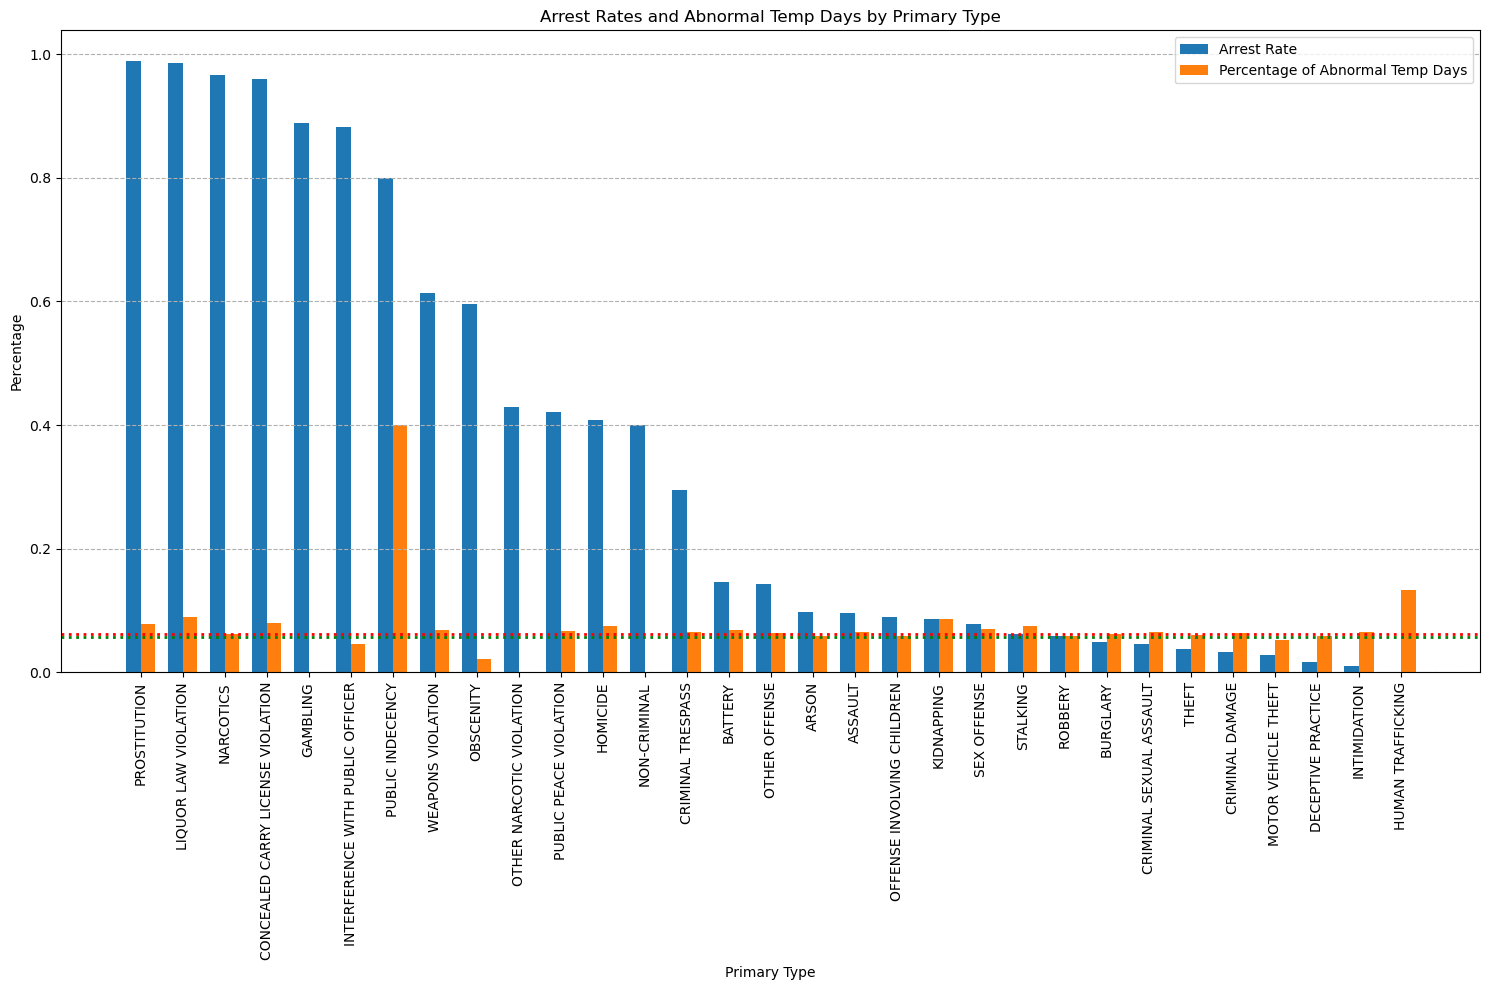

In [37]:
arrest_by_violation_type = data.groupby('Primary Type')['Arrest'].mean()
abnormal_temp_percentage = data.groupby('Primary Type')['T'].mean()
stacked_data = pd.DataFrame({
    'Arrest Rate': arrest_by_violation_type,
    'Abnormal Temp Days (T==1)': abnormal_temp_percentage
})

stacked_data = stacked_data.sort_values(by='Arrest Rate', ascending=False)

plt.figure(figsize=(15, 10))
bar_width = 0.35
x = np.arange(len(stacked_data))

plt.bar(x - bar_width/2, stacked_data['Arrest Rate'], width=bar_width, label='Arrest Rate')
plt.bar(x + bar_width/2, stacked_data['Abnormal Temp Days (T==1)'], width=bar_width,
        label='Percentage of Abnormal Temp Days')
plt.axhline(y=0.06227, color='red', linestyle=':', linewidth=2)
plt.axhline(y=0.05753, color='green', linestyle=':', linewidth=2)



plt.title('Arrest Rates and Abnormal Temp Days by Primary Type')
plt.xticks(x, stacked_data.index, rotation=90)
plt.xlabel('Primary Type')
plt.ylabel('Percentage')
plt.legend()
plt.grid(axis='y', linestyle='--')

plt.tight_layout()
plt.show()


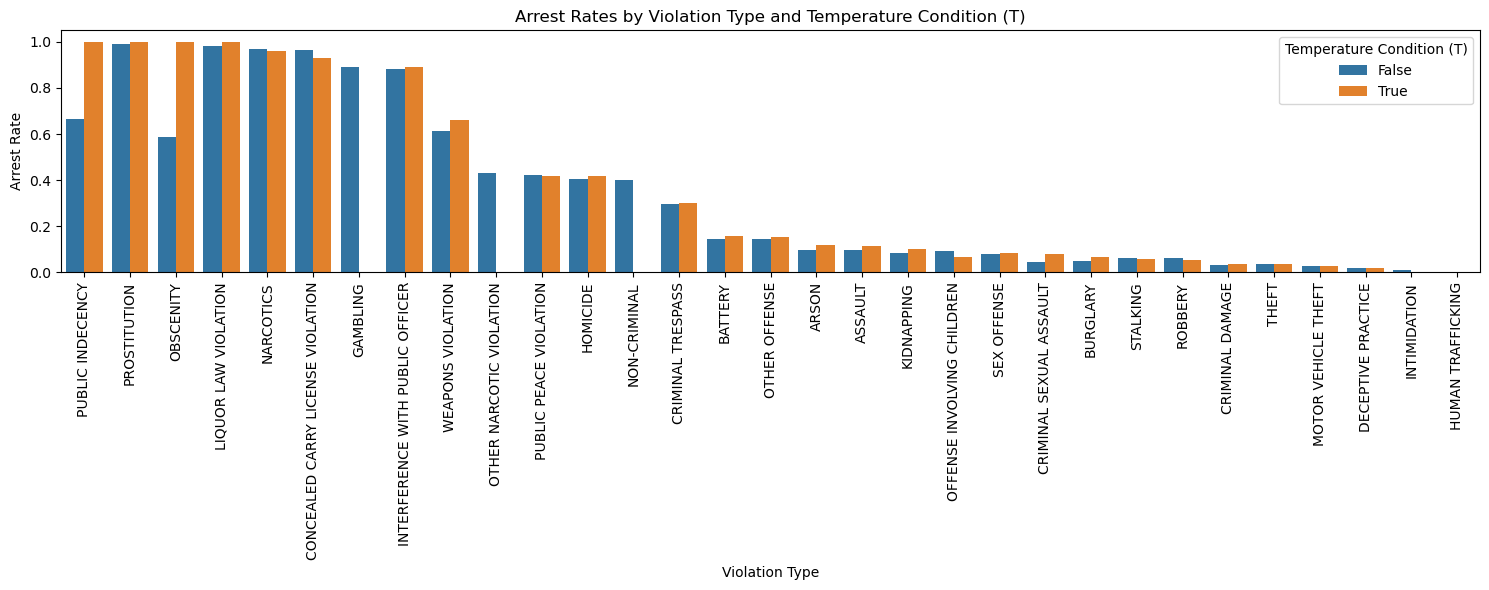

In [39]:
arrest_by_violation_type = data.groupby('Primary Type')['Arrest'].mean()
abnormal_temp_percentage = data.groupby('Primary Type')['T'].mean()

primary_type_data = data.groupby(['Primary Type', 'T'])['Arrest'].mean().reset_index()
primary_type_data = primary_type_data.sort_values(by='Arrest', ascending=False)

# Plot using seaborn for side-by-side bars
plt.figure(figsize=(15, 6))
sns.barplot(x='Primary Type', y='Arrest', hue='T', data=primary_type_data, palette=['#1f77b4', '#ff7f0e'])

# Add labels and titles
plt.title('Arrest Rates by Violation Type and Temperature Condition (T)')
plt.xticks(rotation=90)
plt.xlabel('Violation Type')
plt.ylabel('Arrest Rate')
plt.legend(title='Temperature Condition (T)', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()

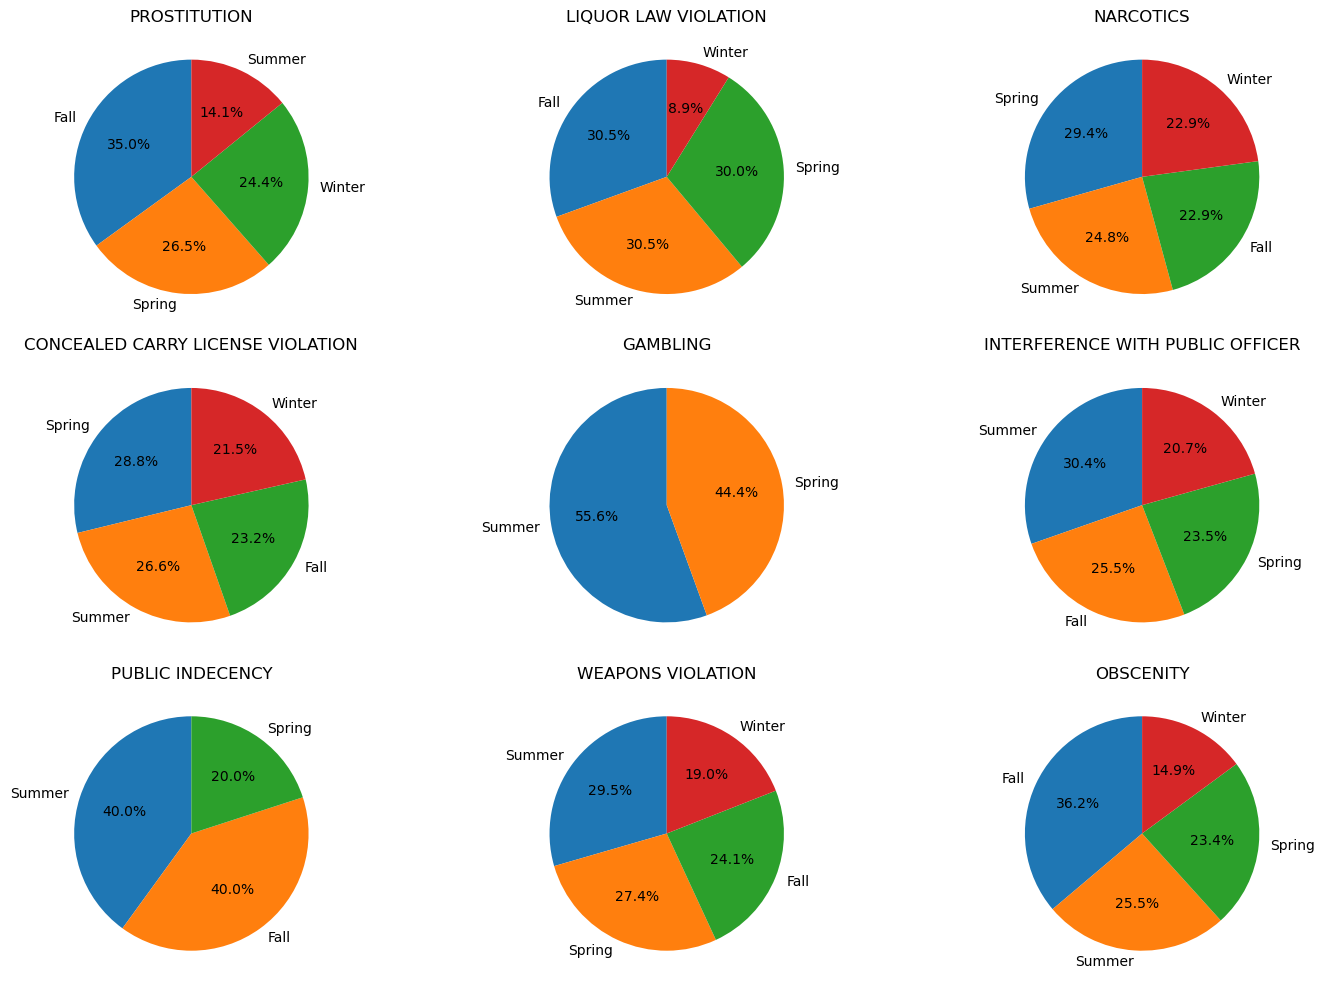

In [50]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()

high_percentage_violations = stacked_data.index.tolist()[:9]

# Loop through each primary type and plot the pie chart
for i, primary_type in enumerate(high_percentage_violations): 
    filtered_data = data[data['Primary Type'] == primary_type]
    season_counts = filtered_data['season'].value_counts()
    
    axes[i].pie(season_counts, labels=season_counts.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(primary_type)

# Remove empty subplots (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Maybe the temperature is a confounder and the only cause is the Primary Type?

([<matplotlib.patches.Wedge at 0x16dce8820>,
 [Text(-1.0022339129490756, 0.4533510601452094, 'Spring'),
  Text(-0.0050980616612246905, -1.0999881861944238, 'Fall'),
  Text(1.0998786896266766, 0.016336098221580407, 'Summer'),
  Text(0.43373658218799116, 1.0108771326288275, 'Winter')],
 [Text(-0.5466730434267684, 0.24728239644284145, '36.5%'),
  Text(-0.0027807609061225582, -0.5999935561060493, '26.9%'),
  Text(0.5999338307054599, 0.008910599029952948, '23.7%'),
  Text(0.2365835902843588, 0.5513875268884513, '12.9%')])

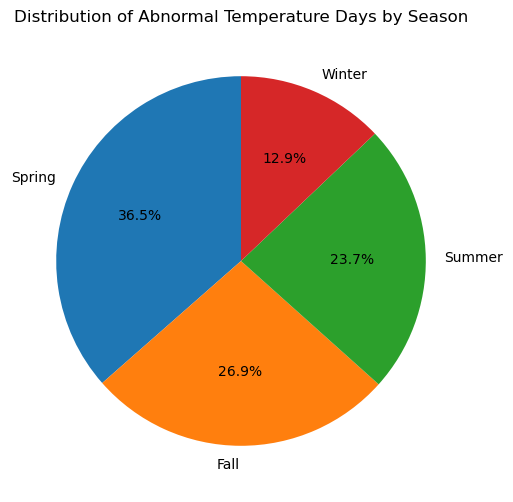

In [17]:
# Piechart showing the distribution of abnormal temperature days
abnormal_temp_days = data[data['T'] == 1]
plt.figure(figsize=(6, 6))
abnormal_temp_days_by_season = abnormal_temp_days['season'].value_counts()
plt.title('Distribution of Abnormal Temperature Days by Season')
plt.pie(abnormal_temp_days_by_season, labels=abnormal_temp_days_by_season.index, autopct='%1.1f%%', startangle=90)

## Differnce in Differences before and Jult 4th

In [41]:
# Cast the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Create 'Post_July4' variable (1 = after July 4th, 0 = before July 4th)
data['Post_July4'] = (data['Date'] > '2022-07-04').astype(int)

# Create the interaction term 'Treated_Post' (T * Post_July4)
data['Treated_Post'] = data['T'] * data['Post_July4']

X = data[['T', 'Post_July4', 'Treated_Post']]
y = data['Arrest']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a logistic regression model (balanced because the arrest class is imbalanced)
logit_model = LogisticRegression(class_weight='balanced')
logit_model.fit(X_train, y_train)
coefficients = logit_model.coef_[0]
intercept = logit_model.intercept_[0]

print(f'Intercept: {intercept}')
print(f'Temperature Effect (T): {coefficients[0]}')
print(f'Post-July 4th Effect (Post_July4): {coefficients[1]}')
print(f'DiD Effect (Treated_Post): {coefficients[2]}')

# The coefficient for Treated_Post is the ATE
ate = coefficients[2]
print(f'Estimated ATE (Post-July4 Effect): {ate}')

Intercept: 0.12110157847906364
Temperature Effect (T): 0.07510873076163072
Post-July 4th Effect (Post_July4): -0.24579511451797265
DiD Effect (Treated_Post): 0.011908945489795332
Estimated ATE (Post-July4 Effect): 0.011908945489795332


In [19]:
data.groupby('Post_July4')['Arrest'].mean()

Post_July4
0    0.131189
1    0.104852
Name: Arrest, dtype: float64

## Seasons

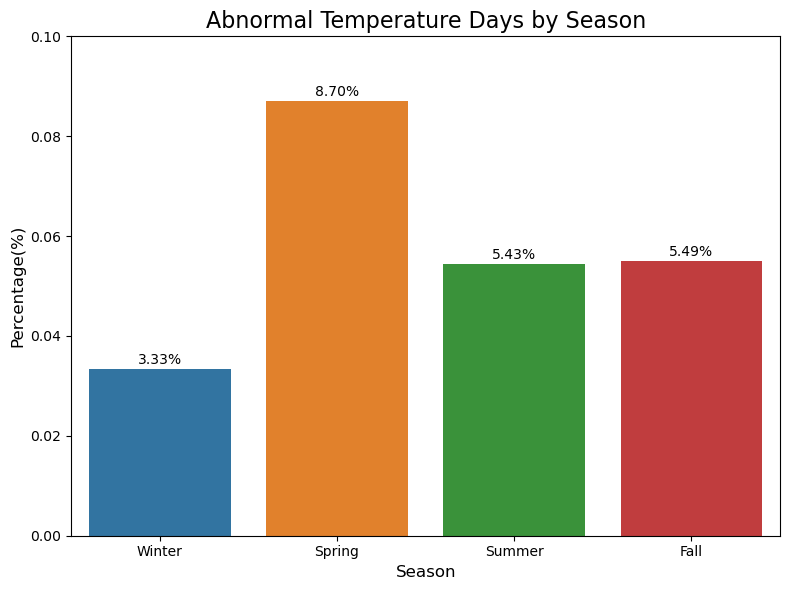

In [75]:
unique_days_per_season = data[['day', 'season', 'T']].drop_duplicates(subset=['day'])
abnormal_temp_by_season = unique_days_per_season.groupby('season')['T'].mean()
vals = [unique_days_per_season.groupby('season')['T'].mean().iloc[3],
        unique_days_per_season.groupby('season')['T'].mean().iloc[1],
        unique_days_per_season.groupby('season')['T'].mean().iloc[2],
        unique_days_per_season.groupby('season')['T'].mean().iloc[0]]

titles = ['Winter', 'Spring', 'Summer', 'Fall']

plt.figure(figsize=(8, 6))
sns.barplot(x=titles, y=vals, hue=titles)

# Add labels and title
plt.title('Abnormal Temperature Days by Season', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Percentage(%)', fontsize=12)
ax = plt.gca()
ax.set_ylim(0, 0.1)

# Show the percentage on top of the bars
for i, v in enumerate(vals):
    plt.text(i, v + 0.001, f'{v:.2%}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()


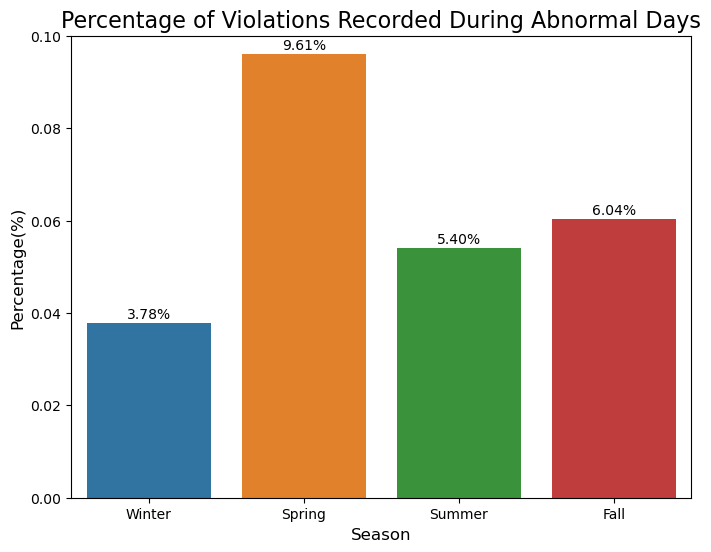

In [73]:
unique_days_per_season = data[['day', 'season', 'T']]
abnormal_temp_by_season = unique_days_per_season.groupby('season')['T'].mean().sort_index()

vals = [unique_days_per_season.groupby('season')['T'].mean().iloc[3],
        unique_days_per_season.groupby('season')['T'].mean().iloc[1],
        unique_days_per_season.groupby('season')['T'].mean().iloc[2],
        unique_days_per_season.groupby('season')['T'].mean().iloc[0]]

titles = ['Winter', 'Spring', 'Summer', 'Fall']

plt.figure(figsize=(8, 6))
sns.barplot(x=titles, y=vals, hue=titles)

# Add labels and title
plt.title('Percentage of Violations Recorded During Abnormal Days', fontsize=16)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Percentage(%)', fontsize=12)
ax = plt.gca()
ax.set_ylim(0, 0.1)

# Show the percentage on top of the bars
for i, v in enumerate(vals):
    plt.text(i, v + 0.001, f'{v:.2%}', ha='center', fontsize=10)

# plt.tight_layout()
plt.show()